In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from lime.lime_image import LimeImageExplainer
from skimage.segmentation import mark_boundaries

c:\Users\admin\Documents\Untitled Folder 1\NewFinalpR\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
pip install lime


  Using cached lime-0.2.0.1-py3-none-any.whl
  Obtaining dependency information for scikit-image>=0.12 from https://files.pythonhosted.org/packages/34/e3/49beb08ebccda3c21e871b607c1cb2f258c3fa0d2f609fed0a5ba741b92d/scikit_image-0.25.2-cp312-cp312-win_amd64.whl.metadata
  Using cached scikit_image-0.25.2-cp312-cp312-win_amd64.whl.metadata (14 kB)
  Obtaining dependency information for networkx>=3.0 from https://files.pythonhosted.org/packages/b9/54/dd730b32ea14ea797530a4479b2ed46a6fb250f682a9cfb997e968bf0261/networkx-3.4.2-py3-none-any.whl.metadata
  Using cached networkx-3.4.2-py3-none-any.whl.metadata (6.3 kB)
  Obtaining dependency information for imageio!=2.35.0,>=2.33 from https://files.pythonhosted.org/packages/cb/bd/b394387b598ed84d8d0fa90611a90bee0adc2021820ad5729f7ced74a8e2/imageio-2.37.0-py3-none-any.whl.metadata
  Using cached imageio-2.37.0-py3-none-any.whl.metadata (5.2 kB)
  Obtaining dependency information for tifffile>=2022.8.12 from https://files.pythonhosted.org/packag


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
model = load_model("pancreas_cnn_model.h5")

In [19]:
def preprocess_image_for_lime(img_path):
    img = image.load_img(img_path, target_size=(128, 128), color_mode='grayscale')
    gray_array = image.img_to_array(img) / 255.0
    gray_array = np.squeeze(gray_array)

    rgb_image = np.stack((gray_array,)*3, axis=-1)
    model_input = np.expand_dims(gray_array, axis=(0, -1))
    return model_input, rgb_image, img




In [ ]:
# def predict_fn(images):
#     # Convert (N, 128, 128, 3) RGB → grayscale by averaging the channels
#     gray_images = np.mean(images, axis=-1, keepdims=True)  # shape: (N, 128, 128, 1)
#     return model.predict(gray_images)


In [ ]:
def predict_fn(images):
    gray_images = np.mean(images, axis=-1, keepdims=True)
    predictions = model.predict(gray_images)
    return predictions

In [ ]:
img_path = "C:/Users/admin/Documents/Untitled Folder 1/NewFinalpR/models/pancreas ct scans/test/normal/1-001.jpg"
model_input, rgb_image, original_img = preprocess_image_for_lime(img_path)

- To identify whether the image is normal or has pancreatic issues (e.g., "pancreatic"), you need to interpret the output of model.predict based on the classes that the model was trained on.

In [ ]:

predictions = predict_fn(np.expand_dims(rgb_image, axis=0))

predicted_class_index = np.argmax(predictions)


class_names = ["Normal", "Pancreatic"]
predicted_class = class_names[predicted_class_index]

print(f"Predicted Class: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 597ms/step
Predicted Class: Normal


In [22]:
explainer = LimeImageExplainer()

In [23]:
explanation = explainer.explain_instance(
    rgb_image,
    predict_fn,
    top_labels=1,
    hide_color=0,
    num_samples=1000
)


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  1%|          | 10/1000 [00:01<02:13,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


  2%|▏         | 20/1000 [00:01<01:05, 15.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


  3%|▎         | 30/1000 [00:01<00:48, 20.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


  4%|▍         | 40/1000 [00:02<00:43, 22.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


  5%|▌         | 50/1000 [00:02<00:36, 26.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  6%|▌         | 60/1000 [00:02<00:31, 30.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


  7%|▋         | 70/1000 [00:03<00:38, 24.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


  8%|▊         | 80/1000 [00:03<00:35, 25.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


  9%|▉         | 90/1000 [00:03<00:31, 28.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 10%|█         | 100/1000 [00:04<00:29, 30.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 11%|█         | 110/1000 [00:04<00:27, 32.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 12%|█▏        | 120/1000 [00:04<00:25, 33.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 13%|█▎        | 130/1000 [00:04<00:23, 36.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 14%|█▍        | 140/1000 [00:05<00:21, 39.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 15%|█▌        | 150/1000 [00:05<00:21, 39.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 16%|█▌        | 160/1000 [00:05<00:21, 38.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 17%|█▋        | 170/1000 [00:05<00:20, 41.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


 18%|█▊        | 180/1000 [00:06<00:20, 39.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 19%|█▉        | 190/1000 [00:06<00:24, 32.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


 20%|██        | 200/1000 [00:06<00:27, 28.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step


 21%|██        | 210/1000 [00:08<00:46, 17.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 22%|██▏       | 220/1000 [00:08<00:39, 19.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step   


 23%|██▎       | 230/1000 [00:10<01:20,  9.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 24%|██▍       | 240/1000 [00:11<01:02, 12.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 25%|██▌       | 250/1000 [00:11<00:52, 14.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 26%|██▌       | 260/1000 [00:11<00:43, 16.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 27%|██▋       | 270/1000 [00:12<00:35, 20.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 797ms/step


 28%|██▊       | 280/1000 [00:14<01:14,  9.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 29%|██▉       | 290/1000 [00:14<00:56, 12.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 30%|███       | 300/1000 [00:14<00:42, 16.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 32%|███▏      | 317/1000 [00:15<00:43, 15.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 32%|███▏      | 320/1000 [00:16<00:58, 11.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 33%|███▎      | 330/1000 [00:16<00:44, 15.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 34%|███▍      | 340/1000 [00:17<00:42, 15.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 35%|███▌      | 350/1000 [00:20<01:27,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 36%|███▌      | 360/1000 [00:20<01:01, 10.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 37%|███▋      | 370/1000 [00:20<00:44, 14.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 38%|███▊      | 380/1000 [00:20<00:33, 18.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 39%|███▉      | 390/1000 [00:20<00:26, 23.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


 40%|████      | 400/1000 [00:21<00:24, 24.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


 41%|████      | 410/1000 [00:21<00:24, 24.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


 42%|████▏     | 420/1000 [00:21<00:22, 25.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 43%|████▎     | 430/1000 [00:22<00:22, 25.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


 44%|████▍     | 440/1000 [00:23<00:30, 18.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step


 45%|████▌     | 450/1000 [00:23<00:31, 17.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


 46%|████▌     | 460/1000 [00:24<00:26, 20.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 47%|████▋     | 470/1000 [00:24<00:22, 23.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


 48%|████▊     | 480/1000 [00:27<01:04,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


 49%|████▉     | 490/1000 [00:27<00:49, 10.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   


 50%|█████     | 500/1000 [00:29<00:59,  8.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 51%|█████     | 510/1000 [00:29<00:44, 10.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


 52%|█████▏    | 520/1000 [00:30<00:34, 14.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step


 53%|█████▎    | 530/1000 [00:31<00:37, 12.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 54%|█████▍    | 540/1000 [00:32<00:43, 10.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 55%|█████▌    | 550/1000 [00:32<00:32, 13.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


 56%|█████▌    | 560/1000 [00:32<00:26, 16.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 57%|█████▋    | 570/1000 [00:35<00:53,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


 58%|█████▊    | 580/1000 [00:36<00:41, 10.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


 59%|█████▉    | 590/1000 [00:36<00:33, 12.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 60%|██████    | 600/1000 [00:36<00:25, 15.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 61%|██████    | 610/1000 [00:37<00:28, 13.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 62%|██████▏   | 620/1000 [00:37<00:22, 17.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 63%|██████▎   | 630/1000 [00:38<00:17, 20.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


 64%|██████▍   | 640/1000 [00:38<00:17, 20.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 65%|██████▌   | 650/1000 [00:39<00:16, 20.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 66%|██████▌   | 660/1000 [00:39<00:17, 19.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


 67%|██████▋   | 670/1000 [00:40<00:17, 19.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 68%|██████▊   | 680/1000 [00:40<00:16, 19.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step


 69%|██████▉   | 690/1000 [00:41<00:18, 16.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 70%|███████   | 700/1000 [00:43<00:30,  9.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 71%|███████   | 710/1000 [00:43<00:22, 12.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 72%|███████▏  | 720/1000 [00:43<00:16, 16.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


 73%|███████▎  | 730/1000 [00:44<00:13, 20.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 74%|███████▍  | 740/1000 [00:44<00:10, 23.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


 75%|███████▌  | 750/1000 [00:44<00:12, 20.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 76%|███████▌  | 760/1000 [00:45<00:10, 22.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


 77%|███████▋  | 770/1000 [00:45<00:10, 21.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


 78%|███████▊  | 780/1000 [00:46<00:09, 22.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 79%|███████▉  | 790/1000 [00:46<00:08, 24.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


 80%|████████  | 800/1000 [00:46<00:07, 25.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


 81%|████████  | 810/1000 [00:47<00:07, 25.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 82%|████████▏ | 820/1000 [00:47<00:06, 26.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 83%|████████▎ | 830/1000 [00:47<00:05, 28.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 84%|████████▍ | 840/1000 [00:48<00:05, 31.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


 85%|████████▌ | 850/1000 [00:48<00:06, 23.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 86%|████████▌ | 860/1000 [00:49<00:05, 23.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


 87%|████████▋ | 870/1000 [00:50<00:07, 18.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 88%|████████▊ | 880/1000 [00:50<00:06, 19.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


 89%|████████▉ | 890/1000 [00:50<00:04, 22.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


 90%|█████████ | 900/1000 [00:55<00:16,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 91%|█████████ | 910/1000 [00:55<00:10,  8.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 92%|█████████▏| 920/1000 [00:55<00:07, 10.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 93%|█████████▎| 930/1000 [00:55<00:04, 14.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 94%|█████████▍| 940/1000 [00:56<00:03, 17.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step


 95%|█████████▌| 950/1000 [00:56<00:03, 16.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


 96%|█████████▌| 960/1000 [00:57<00:02, 18.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 97%|█████████▋| 970/1000 [00:57<00:01, 18.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


 98%|█████████▊| 980/1000 [00:58<00:00, 20.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 99%|█████████▉| 990/1000 [00:58<00:00, 23.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step


100%|██████████| 1000/1000 [00:59<00:00, 16.86it/s]


In [ ]:
temp, mask = explanation.get_image_and_mask(
    explanation.top_labels[0],  
    positive_only=True,        
    num_features=5,             
    hide_rest=True              
)

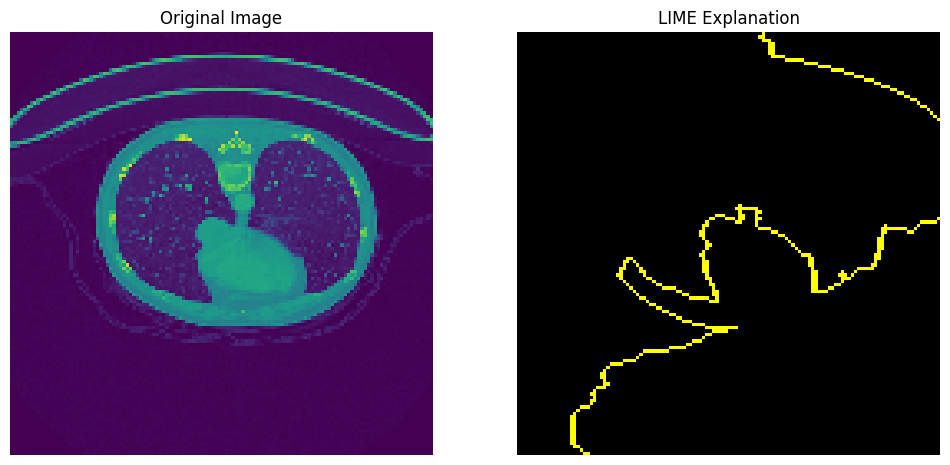

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
# Original image
ax[0].imshow(original_img)
ax[0].axis('off')
ax[0].set_title("Original Image")

# LIME superimposed explanation
ax[1].imshow(mark_boundaries(temp / 255.0, mask))
ax[1].axis('off')
ax[1].set_title("LIME Explanation")

plt.show()

#TWEAKS

In [ ]:
temp, mask = explanation.get_image_and_mask(
    label=explanation.top_labels[0],  
    positive_only=True,               
    num_features=5,                  
    hide_rest=False                   
)

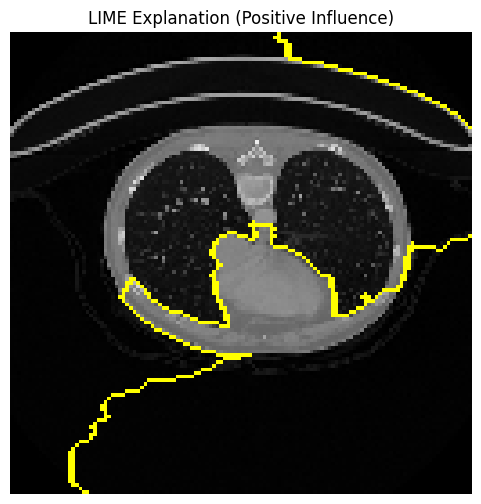

In [28]:
plt.figure(figsize=(6, 6))
plt.imshow(mark_boundaries(temp, mask))
plt.axis('off')
plt.title("LIME Explanation (Positive Influence)")
plt.show()

In [29]:
temp, mask = explanation.get_image_and_mask(
    label=explanation.top_labels[0],
    positive_only=False,
    num_features=10,
    hide_rest=False
)


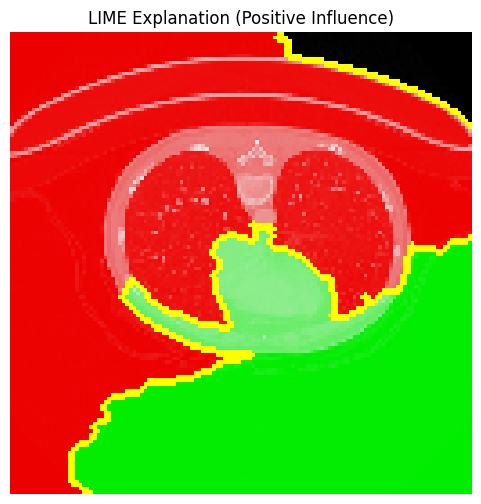

In [30]:
plt.figure(figsize=(6, 6))
plt.imshow(mark_boundaries(temp, mask))
plt.axis('off')
plt.title("LIME Explanation (Positive Influence)")
plt.show()

In [31]:
temp, mask = explanation.get_image_and_mask(
    label=explanation.top_labels[0],
    positive_only=True,
    num_features=5,
    hide_rest=True
)

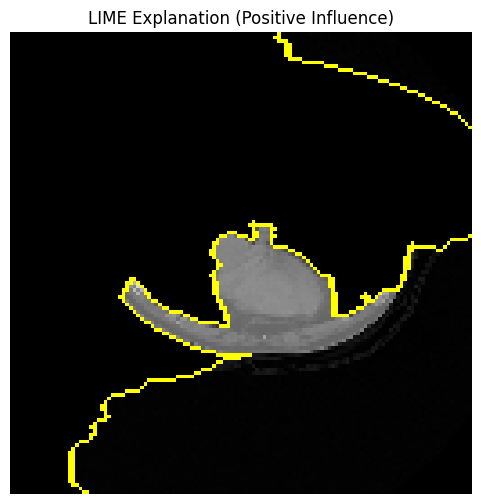

In [32]:
plt.figure(figsize=(6, 6))
plt.imshow(mark_boundaries(temp, mask))
plt.axis('off')
plt.title("LIME Explanation (Positive Influence)")
plt.show()

In [33]:
from skimage.color import label2rgb

In [34]:
lime_overlay = label2rgb(mask, image=np.array(original_img)/255.0, bg_label=0, kind='overlay')

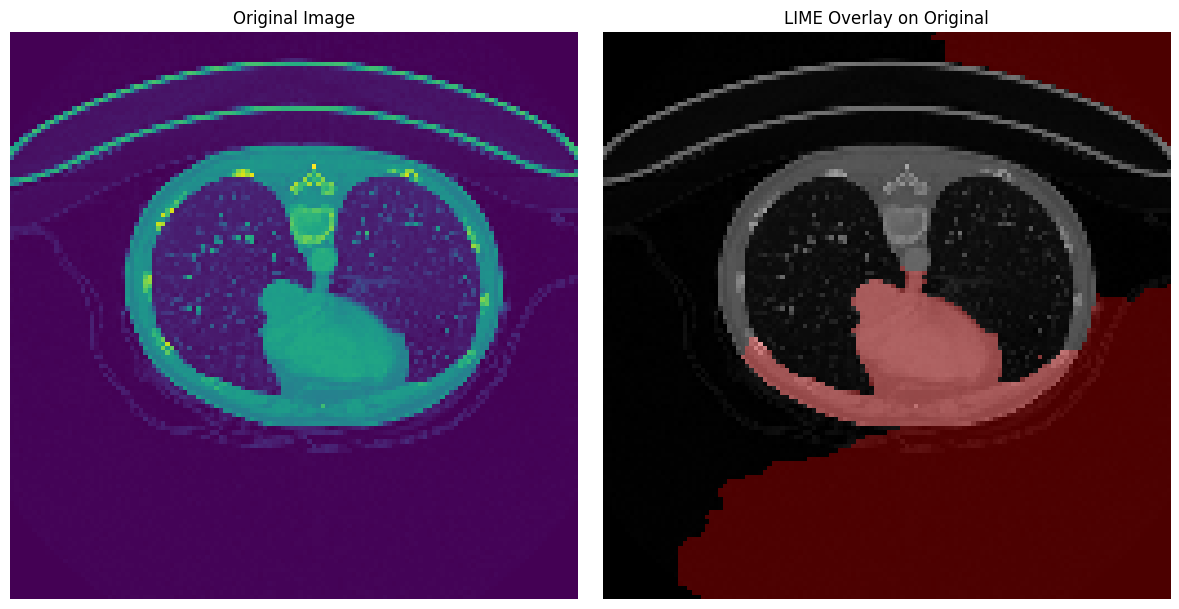

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Left: Original CT image
ax[0].imshow(original_img)
ax[0].axis('off')
ax[0].set_title("Original Image")

# Right: Original with LIME overlay
ax[1].imshow(lime_overlay)
ax[1].axis('off')
ax[1].set_title("LIME Overlay on Original")

plt.tight_layout()
plt.show()